In [4]:
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image
import requests


In [5]:

# Load the processor and the model
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-large")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-large")


preprocessor_config.json:   0%|          | 0.00/445 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/527 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.60k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.88G [00:00<?, ?B/s]

In [7]:
# Example: Load an image from a URL
image_url = "https://huggingface.co/datasets/Narsil/image_dummy/raw/main/parrots.png"
image = Image.open(requests.get(image_url, stream=True).raw)

In [12]:
# Preprocess the image
inputs = processor(images=image, return_tensors="pt")

# Generate caption
output = model.generate(**inputs, max_new_tokens=50)

# Decode and print the caption
caption = processor.decode(output[0], skip_special_tokens=True)
print("Generated Caption:", caption)


Generated Caption: there are two parrots that are standing next to each other


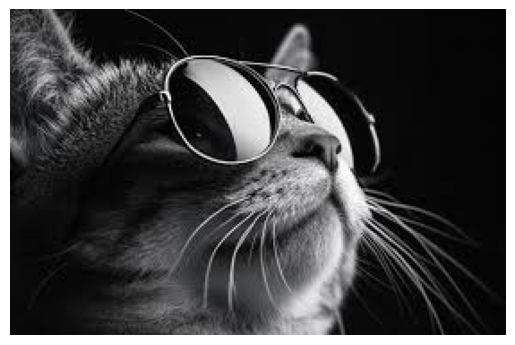

In [13]:
from PIL import Image
import matplotlib.pyplot as plt

# Load the image
image_path = '/kaggle/input/test-image/images.jpeg'
image = Image.open(image_path)

plt.imshow(image)
plt.axis('off')  
plt.show()


In [11]:
def generate_caption(image_path_or_url, model, processor):
    # Load the image
    if image_path_or_url.startswith("http"):
        image = Image.open(requests.get(image_path_or_url, stream=True).raw).convert("RGB")
    else:
        image = Image.open(image_path_or_url).convert("RGB")

    # Preprocess the image and generate caption
    inputs = processor(images=image, return_tensors="pt")
    output = model.generate(**inputs)
    return processor.decode(output[0], skip_special_tokens=True)

# Example usage
caption = generate_caption("/kaggle/input/test-image/images.jpeg", model, processor)
print("Generated Caption:", caption)


Generated Caption: arafed cat wearing sunglasses looking up at something in the air
